In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns

# Fáza 1 - prieskumná analýza

## 1. Základný opis dát spolu s ich charakteristikami (5 bodov)

Vypísali sme načítanú tabuľku, odkiaľ sme vymazali indexi, lebo pandas nám to pridá sám

In [3]:
from matplotlib import pyplot
sns.set_theme(style="dark", palette="pastel")
dataset = pd.read_csv("042/labor.csv", delimiter="\t")
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset

,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,no,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,no,6.61722,divoced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Diane Dunn,NaN,no,8.84155,married,410-38-6674,2.32670,165.53795,8.77005,88.36972,56.40210,28.48174,7.23321,6.44218,6.13313,0.0,6.33770
3,Debra Cameron,8.52161,Y,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
4,Vincent Mccullough,4.35962,no,6.61320,divoced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10034,Kenneth Sanchez,4.67432,N,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
10035,Jennifer Franklin,5.38144,Y,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
10036,Valerie Carter,3.16568,Y,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
10037,Julie Newman,4.80303,Y,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


### Počet záznamov a počet atribútov:

Dozvedeli sme sa, že máme 10039 záznamov a 17 atribútov

In [4]:
profiles = len(dataset.index)
attributes = len(dataset.columns)
data = [[profiles], [attributes]]
sum_of_dataset = pd.DataFrame(data, columns = ['Number'], index = ['Profiles','Attributes'])
sum_of_dataset.style

,Number
Profiles,10039
Attributes,17


### Typy dát:
Jednotlivé typy dát sú viditelné v nasledujúcej tabuľke.

In [5]:
info = pd.DataFrame(dataset.dtypes)
info = info.set_axis(['Dtype'], axis=1, inplace=False)
info.style


,Dtype
name,object
hematokrit,float64
smoker,object
leukocyty,float64
relationship,object
ssn,object
alt,float64
weight,float64
erytrocyty,float64
alp,float64


### Distribúcia významných atribútov:

Histogramy boli vytvorené pre niekoľo atribútov, napr. **hematokrit, leukocyty, alt, weight, erytrocyty, alp,
ast, er-cv, etytr, hemoglobin, trombocyty, indicator, hbver**


array([[<AxesSubplot:title={'center':'hematokrit'}>,
        <AxesSubplot:title={'center':'leukocyty'}>,
        <AxesSubplot:title={'center':'alt'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'erytrocyty'}>,
        <AxesSubplot:title={'center':'alp'}>,
        <AxesSubplot:title={'center':'ast'}>,
        <AxesSubplot:title={'center':'er-cv'}>],
       [<AxesSubplot:title={'center':'etytr'}>,
        <AxesSubplot:title={'center':'hemoglobin'}>,
        <AxesSubplot:title={'center':'trombocyty'}>,
        <AxesSubplot:title={'center':'indicator'}>],
       [<AxesSubplot:title={'center':'hbver'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

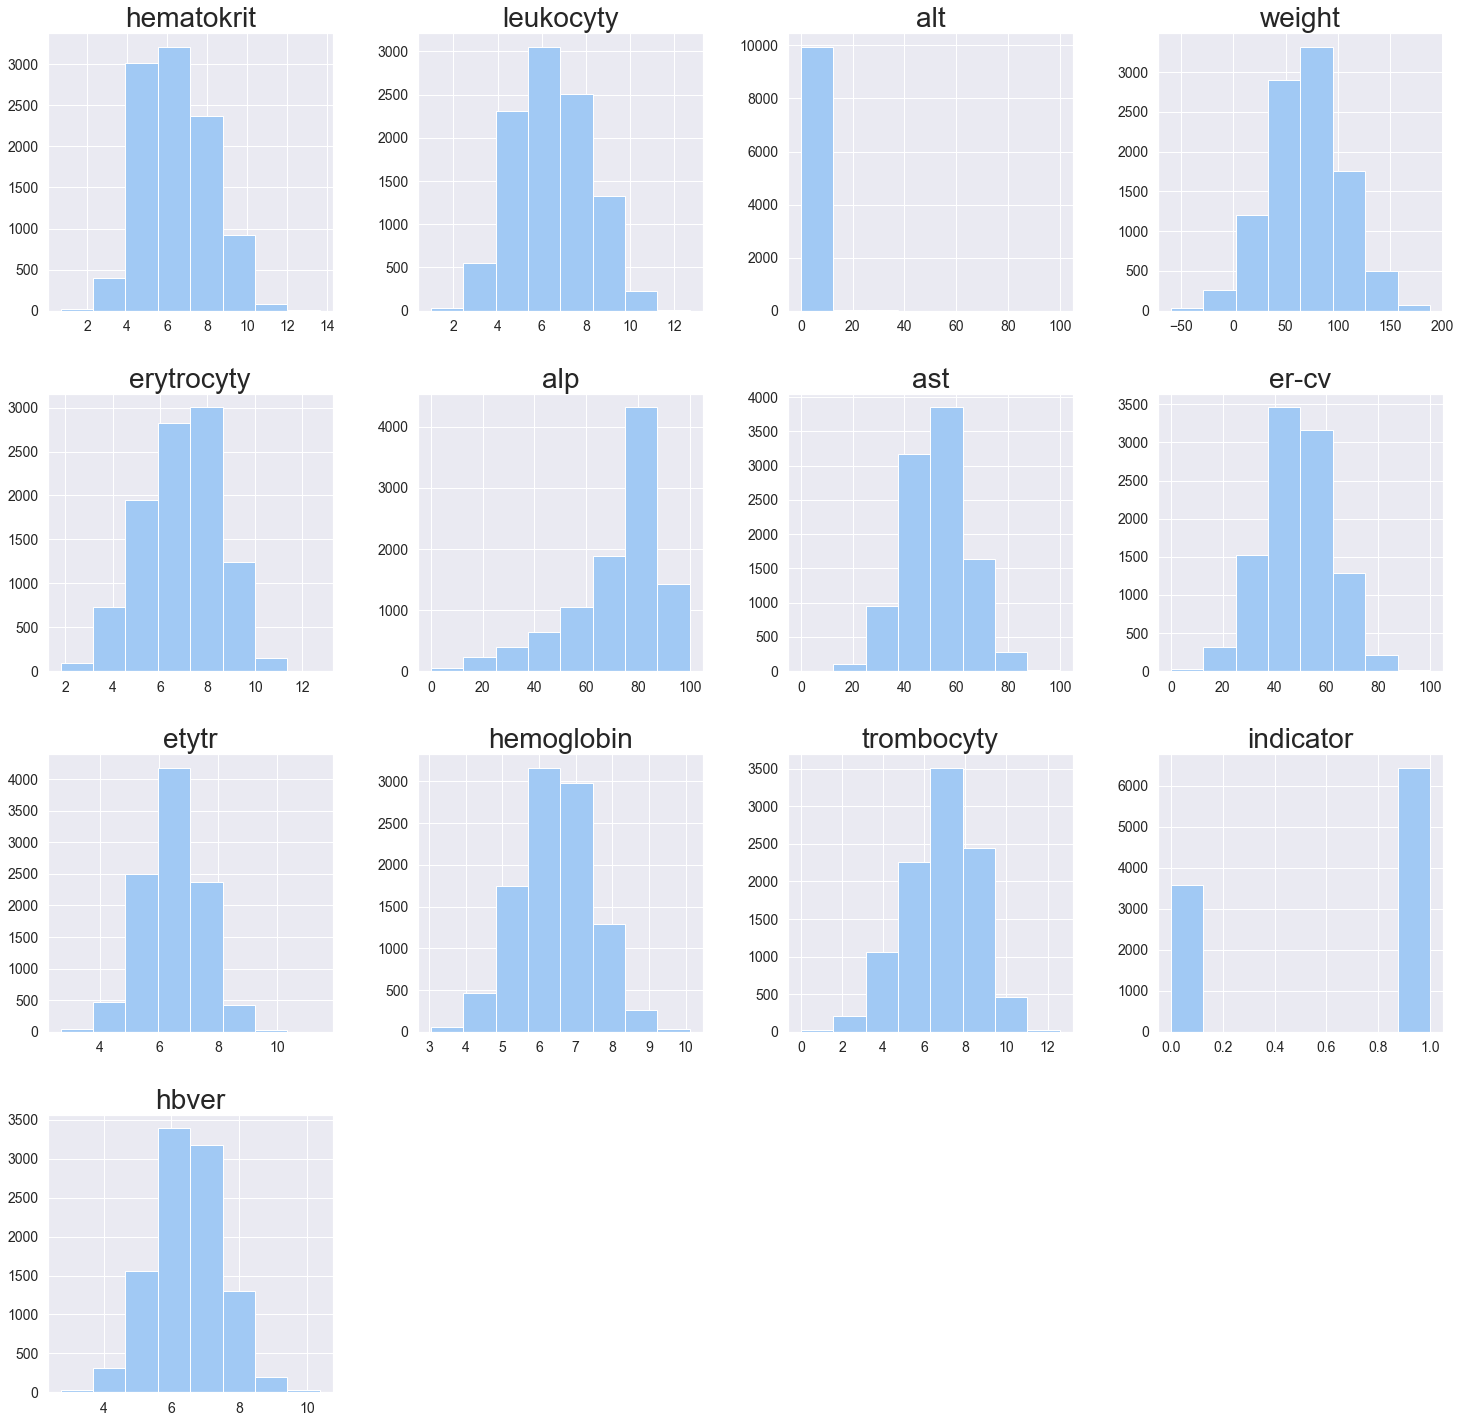

In [6]:
# dataset.head()
fig = dataset.hist(bins=8, figsize=[25, 25], xlabelsize=14, ylabelsize=14)
[x.title.set_size(28) for x in fig.ravel()]
fig

### Základné deskriptívne štatistiky

K základný deskriptívnym štatistikám patria: **medián, modus, priemer, smerodajná odchýlka, minimálna
a maximálna hodnota, variancia...**

*Vypočítanie modusu nemá význam, pretože jednotlivé záznamy sú jednoznačné (nevyskytujú sa viackrát)*

In [7]:
desc_stat_table = dataset.select_dtypes(include=[np.float64])
desc_stat = dataset.describe()
desc_stat.loc['median'] = desc_stat_table.median()
desc_stat.loc['variance'] = desc_stat_table.var()
# modus nie je mozne urobit, nie su jednoznacne
desc_stat.style


,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
count,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000,10008.000000,10009.000000,10009.000000,10008.000000,10009.000000,10009.000000,10039.000000,10009.000000
mean,6.453032,6.450274,1.306090,69.805192,6.898802,71.949719,52.343359,49.060376,6.476717,6.464414,6.828460,0.642295,6.475601
std,1.665991,1.700428,2.080683,35.581044,1.605785,18.109229,11.880597,13.084279,0.994156,1.006072,1.734330,0.479349,1.004527
min,0.683890,0.979140,0.000000,-59.892790,1.811270,0.000000,0.000000,0.000000,2.678710,3.054200,0.000000,0.000000,2.738210
25%,5.197180,5.177990,0.521560,46.183730,5.748830,63.818647,44.490180,40.393810,5.802672,5.786020,5.665190,0.000000,5.806840
50%,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
75%,7.669982,7.693890,1.344220,93.175640,8.052080,84.986902,60.275100,57.766910,7.147997,7.140870,8.078720,1.000000,7.147590
max,13.633550,12.694630,100.000000,188.436090,12.733320,100.000000,100.000000,100.000000,11.426920,10.112330,12.595220,1.000000,10.361820
median,6.227605,6.352150,0.773820,70.018130,7.036180,78.203065,52.376590,48.923340,6.480035,6.476210,7.002890,1.000000,6.478430
variance,2.775527,2.891457,4.329243,1266.010690,2.578547,327.944181,141.148595,171.198357,0.988347,1.012181,3.007899,0.229775,1.009075


##  2. Párová analýza dát

V tejto sekcii sme preskúmali koreláciu medzi jednotlivými atribútami pomocou funkcie matshow() z knižnice matplotlib.
Ako je možné vidieť, najvyššia pozitívna korelácia je medzi atribútom 'indicator' a atribútom 'trombocyty'.
Druhá najvyššia pozitívna korelácia je medzi atribútom 'etrocyty' a atribútom 'alt'.
Najvyššia negatívna korelácia je medzi atribútom 'erytrocyty' a atribútom 'hematokrit'.

,hematokrit,leukocyty,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
hematokrit,1.000000,-0.035522,-0.189589,-0.001973,-0.465486,0.016232,-0.005173,0.005333,0.002552,-0.015807,-0.035439,-0.000303,0.010663
leukocyty,-0.035522,1.000000,0.168388,-0.013297,0.325243,0.006254,0.008797,-0.003789,0.001818,0.002873,0.152565,0.003806,-0.027663
alt,-0.189589,0.168388,1.000000,-0.008129,0.562912,0.003450,-0.000498,-0.004342,0.004709,0.000778,-0.249282,-0.088956,-0.016101
weight,-0.001973,-0.013297,-0.008129,1.000000,0.005316,0.008733,0.018511,0.005936,0.006945,-0.000762,0.001160,-0.000745,0.002998
erytrocyty,-0.465486,0.325243,0.562912,0.005316,1.000000,0.004859,0.004136,0.007379,0.005965,0.014648,-0.339868,-0.324942,-0.009878
alp,0.016232,0.006254,0.003450,0.008733,0.004859,1.000000,0.000184,-0.010546,0.000059,-0.222828,0.006122,0.009448,-0.004786
ast,-0.005173,0.008797,-0.000498,0.018511,0.004136,0.000184,1.000000,-0.010656,-0.011953,0.007756,0.009759,-0.005213,0.011179
er-cv,0.005333,-0.003789,-0.004342,0.005936,0.007379,-0.010546,-0.010656,1.000000,-0.002173,0.007510,-0.002161,0.002313,0.001687
etytr,0.002552,0.001818,0.004709,0.006945,0.005965,0.000059,-0.011953,-0.002173,1.000000,0.000625,-0.008126,-0.012031,0.000659
hemoglobin,-0.015807,0.002873,0.000778,-0.000762,0.014648,-0.222828,0.007756,0.007510,0.000625,1.000000,-0.000889,0.007017,0.003178


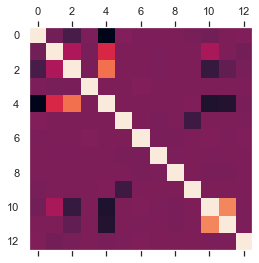

In [8]:
correllation = dataset.corr()
mt.pyplot.matshow(correllation)
correllation.style.background_gradient(cmap='coolwarm')

Podľa korelácie vieme, že atribút 'alt' a atribút 'erytrocyty' majú súvislosť (hodnotu) 0,56, čo znamená,
že môžeme skúsiť vytvoriť graf, aby sme sa dozvedeli viac.

Podľa grafu sme sa dozvedeli, že čím viac máme hodnotu 'alt', tým viac máme 'erytrocyty'.
Závislosť atribútu 'erytrocyty' od atribútu 'alt' má logaritmickú krivku.

### Alt a Erytrocyty

<AxesSubplot:xlabel='alt', ylabel='erytrocyty'>

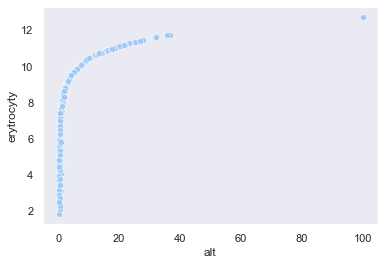

In [9]:
sns.scatterplot(data=dataset, x='alt', y='erytrocyty', )
# .set(xscale="log", yscale="log")

Podľa tabuľky korelácii vieme, že aj atribút 'erytrocyty' a atribút 'leukocyty' majú nejakú súvisloť, ale žial z grafu nevieme veľa vyčítať.
To isté sa stalo aj pri závislosti atribútu 'erytrocyty' od atribútu 'hematokrit'.

### Leukocyty a Erytrocyty

<AxesSubplot:xlabel='erytrocyty', ylabel='leukocyty'>

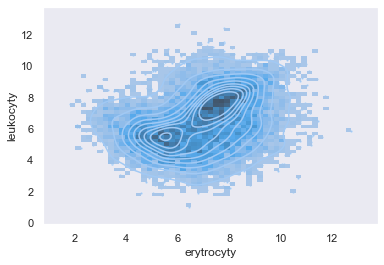

In [10]:
sns.scatterplot(data=dataset, x='erytrocyty', y='leukocyty',s=6)
sns.histplot(data=dataset, x='erytrocyty', y='leukocyty')
sns.kdeplot(data=dataset, x='erytrocyty', y='leukocyty')
#sns.jointplot(data=dataset, x='erytrocyty', y='leukocyty')



### Erytrocyty a Hematokrit

<AxesSubplot:xlabel='erytrocyty', ylabel='hematokrit'>

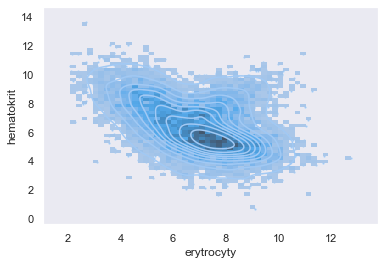

In [11]:
sns.scatterplot(data=dataset, x='erytrocyty', y='hematokrit',s=6)
sns.histplot(data=dataset, x='erytrocyty', y='hematokrit')
sns.kdeplot(data=dataset, x='erytrocyty', y='hematokrit')

### Trombocyty a Alt

<AxesSubplot:xlabel='trombocyty', ylabel='alt'>

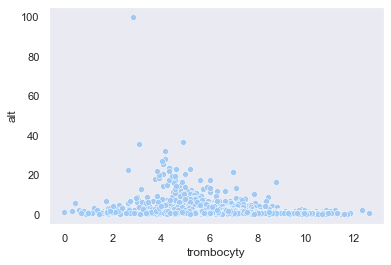

In [12]:
sns.scatterplot(data=dataset, x='trombocyty', y='alt')



### Trombocyty a Erytrocyty

<AxesSubplot:xlabel='trombocyty', ylabel='erytrocyty'>

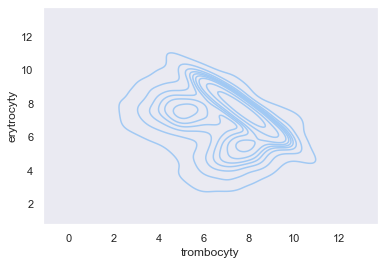

In [13]:
sns.kdeplot(data=dataset, x='trombocyty', y='erytrocyty')

Pomocou grafu typu boxplot môžeme vidieť, že čím vyššie sú trombocyty, tým vyšší je indicator.
Z tejto korelácie môžeme vyčítať, že vyššie trombocyty znamenajú horší stav pacienta s leukémiou.

<AxesSubplot:xlabel='indicator', ylabel='trombocyty'>

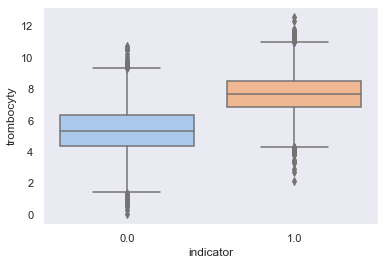

In [14]:
sns.boxplot(data=dataset, x='indicator', y='trombocyty')
#dataset.head()


So zdravotným stavom pacienta súvisia aj erytrocyty. Z korelačnej tabuľky môžeme vyčítať, že erytrocyty neovplyvnia až
tak stav pacienta ako trombocyty, no určitá súvislosť je viditelná. Podľa boxplotu vidíme, že čím menej erytrocytov má
pacient, tým je pacientov stav horší.

<AxesSubplot:xlabel='indicator', ylabel='erytrocyty'>

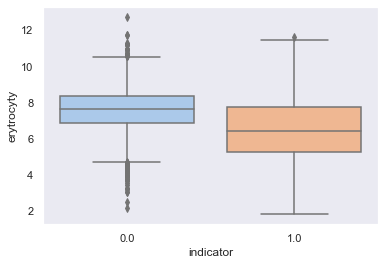

In [15]:
sns.boxplot(data=dataset, x='indicator', y='erytrocyty')

## 3. Formulácia a štatistické overenie hypotéz o dátach

Hypotéza 1:

H0 - Pacienti, ktorí fajčia majú takú istú šancu na Leukémiu

H1 - Pacienti, ktorí fajčia majú väčšiu šancu na Leukémiu


Upravime dataset series [smoker], aby sme vedeli hypotézu testovať

In [16]:
smoker_series = dataset['smoker']
replacement_dict = {
    "Y": 1,
    "yes": 1,
    "N": 0,
    "no": 0
}
dataset["smoker"].replace(replacement_dict, inplace=True)
# smokers = dataset['smoker'] == 1
smokers = dataset.loc[(dataset["smoker"] == 1), "indicator"]
non_smokers = dataset.loc[(dataset["smoker"] == 0), "indicator"]

#sns.heatmap(dataset.corr())

Vypíšme koľko percent tvoria fajčiari z datasetu

([<matplotlib.patches.Wedge at 0x1a0c3ac6b80>,
 [Text(-1.137903295731835, 0.3810198020610325, 'smokers'),
  Text(1.137903295731835, -0.3810198020610326, 'non smokers')],
 [Text(-0.6637769225102369, 0.22226155120226893, '40%'),
  Text(0.6637769225102369, -0.222261551202269, '60%')])

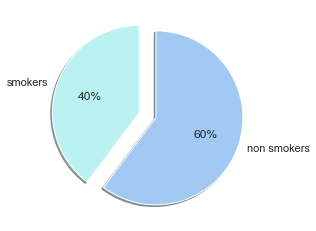

In [17]:
plt.pie([len(smokers), len(non_smokers)], labels = ["smokers","non smokers"], colors = ['c','b'], startangle = 90, shadow = True, explode = (0.1, 0.1), autopct='%1.0f%%')

Hypoteza 1 je unpaired, not normally distributed

Hypoteza 1 je nepárovaná, nie je normálne ditribuovaná

In [18]:
shapiro_test = sc.stats.shapiro(smokers)
print("Pvalue hodnota po vykonaní shapirovho testu:", shapiro_test.pvalue)
print("Je to normalna distribucia") if shapiro_test.pvalue > 0.05 else print("Nie je to normalna distribucia")

Pvalue hodnota po vykonaní shapirovho testu: 0.0
Nie je to normalna distribucia


Vykonali sme Mann-Whitney U test

Dostali sme p hodnotu väčšiu ako 0.05 -> nevieme potvrdit hypotezu (fail to reject H0)

In [19]:
whitney = sc.stats.mannwhitneyu(smokers,non_smokers)
print("Pvalue hodnota po vykonaní Mann Whitney: ",whitney.pvalue)

if whitney.pvalue > 0.05:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Pvalue hodnota po vykonaní Mann Whitney:  0.9603085731469949
Same distribution (fail to reject H0)


### 4. Identifikácia problémov v dátach s navrhnutým riešením

S datasetom, ktorým sme doteraz pracovali identifikujeme problémy. Dropli sme z datasetu záznamy, ktoré nemajú všetkých
atribútov, vymenili sme chybové dáta, kde boli preklepi, a resetli sme indexi

In [20]:
"""Identifikacia problemov"""
dataset = dataset.dropna()
# dataset.head()

dataset["relationship"].replace("divoced","divorced",inplace=True)
# dataset.drop_duplicates(subset='name', inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset
# print(smoker_series.unique())

C:\Users\szacs\PycharmProjects\IAU\venv\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,name,hematokrit,smoker,leukocyty,relationship,ssn,alt,weight,erytrocyty,alp,ast,er-cv,etytr,hemoglobin,trombocyty,indicator,hbver
0,Courtney Sparks,5.10789,0,3.67594,married,211-15-5030,1.36076,65.50748,7.92270,80.65839,40.27331,46.67907,6.93084,7.07385,2.43339,0.0,6.73439
1,David Cook,6.06717,0,6.61722,divorced,134-25-6459,1.10335,80.56053,7.13748,95.49950,51.14865,21.09764,6.17378,6.30636,3.16922,0.0,6.69188
2,Debra Cameron,8.52161,1,8.76540,married,327-02-6401,3.08378,56.12232,9.11128,57.21363,57.61393,67.05110,7.25101,7.74219,5.54453,0.0,6.08754
3,Vincent Mccullough,4.35962,0,6.61320,divorced,469-50-8029,5.08135,93.52107,9.68805,82.12788,75.41991,53.04260,6.18335,5.69975,5.34519,0.0,6.34100
4,Lauren Harris,5.32524,1,6.52586,divorced,755-50-6094,0.89996,57.01768,7.78640,80.50126,44.08776,60.41555,5.33112,6.68497,7.49621,1.0,6.88636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,Kenneth Sanchez,4.67432,0,5.22478,married,035-07-2574,0.75385,4.79395,7.40597,80.98445,42.89142,47.93544,5.69357,6.46889,4.59180,0.0,6.23398
9709,Jennifer Franklin,5.38144,1,6.77403,widowed,369-05-1763,0.68170,72.43763,7.38835,88.27656,55.07674,43.86325,5.33810,6.04664,8.02259,1.0,7.56910
9710,Valerie Carter,3.16568,1,6.30583,married,546-10-0083,0.49297,26.26844,6.22727,49.46443,56.32268,59.28561,8.32349,4.43833,9.62061,1.0,7.53199
9711,Julie Newman,4.80303,1,6.78358,widowed,556-01-2815,1.92676,57.92751,8.64693,44.97615,53.85140,56.17723,7.25014,8.14832,6.77935,1.0,4.97849


Je možné vidieť, že v informáciach sú všade jednotné počty záznamov

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9713 entries, 0 to 9712
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          9713 non-null   object 
 1   hematokrit    9713 non-null   float64
 2   smoker        9713 non-null   int64  
 3   leukocyty     9713 non-null   float64
 4   relationship  9713 non-null   object 
 5   ssn           9713 non-null   object 
 6   alt           9713 non-null   float64
 7   weight        9713 non-null   float64
 8   erytrocyty    9713 non-null   float64
 9   alp           9713 non-null   float64
 10  ast           9713 non-null   float64
 11  er-cv         9713 non-null   float64
 12  etytr         9713 non-null   float64
 13  hemoglobin    9713 non-null   float64
 14  trombocyty    9713 non-null   float64
 15  indicator     9713 non-null   float64
 16  hbver         9713 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


Začneme pracovať aj s druhým datasetom, kde máme jednotlivé profily pacientov. Urobme aj tu menšie opravy, aby sme s
dátami vedeli lepšie pracovať.

Dropli sme duplikáty, také záznamy kde sme nemali všteky informácie dané, vymenili sme chybové stringi a zmazali sme aj
prvý stĺpec, kde sme mali indexi záznamov, nakoľko nám to pandas sám pridá.

In [71]:
# Second dataset

dataprofiles = pd.read_csv("042/profiles.csv", delimiter="\t")
dataprofiles.drop(dataprofiles.columns[0], axis=1, inplace=True)
dataprofiles.drop_duplicates(subset="name", inplace=True)
dataprofiles['birthdate'] = pd.to_datetime(dataprofiles['birthdate'])
dataprofiles.dropna(inplace=True)
dataprofiles.replace({"black":"Black","blsck":"Black","white":"White"}, inplace=True)

In [60]:
def outliers(data):
    # calculate interquartile range
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = []
    for x in data:
        if x < lower or x > upper:
            outliers.append(np.median(data))
        else:
            outliers.append(x)
    return outliers
    # outliers = [x for x in data if x < lower or x > upper]

def outl(string):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    median = dataset.loc[dataset[string] < lower or dataset[string] > upper, string].median()
    dataset[string] = np.where(dataset[string] < lower or dataset[string] > upper, median,dataset[string])

9713


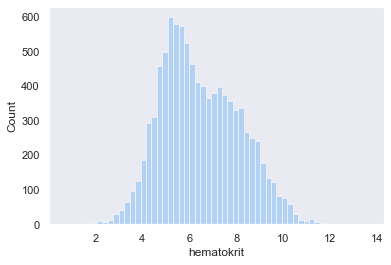

In [56]:
sns.histplot(data=dataset, x="hematokrit")
print(len(dataset["hematokrit"]))
# outliers(dataset['hematokrit'])

9713


<AxesSubplot:ylabel='Count'>

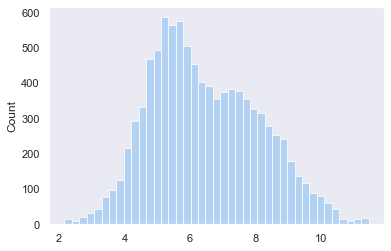

In [69]:
# trying winsorize
a=sc.stats.mstats.winsorize(dataset['hematokrit'], limits=[0.001,0.001])
print(len(a))
sns.histplot(a)